In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🌟 Exercise 1: Duplicate Detection and Removal
Instructions

In [66]:
!unzip "/content/drive/MyDrive/GENAI/Week2/Day3/titanic dataset.zip"

Archive:  /content/drive/MyDrive/GENAI/Week2/Day3/titanic dataset.zip
replace titanic dataset/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: titanic dataset/gender_submission.csv  
replace titanic dataset/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: titanic dataset/test.csv  
replace titanic dataset/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: titanic dataset/train.csv  


In [143]:
import pandas as pd

In [104]:
train_file = pd.read_csv("/content/titanic dataset/train.csv")
train_df = pd.DataFrame(train_file)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
train_df.shape[0]

891

In [106]:
train_duplicates = train_df.duplicated().value_counts()
train_duplicates

,count
False,891


In [107]:
new_train_df = train_df.drop_duplicates()
new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [108]:
new_train_df.shape[0]

891

🌟 Exercise 2: Handling Missing Values

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
new_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
new_train_df.shape[0]

891

In [111]:
new_train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [112]:
new_train_df["Cabin"].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [121]:
new_train_df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [122]:
new_train_df2 = new_train_df.dropna(subset = "Cabin")
new_train_df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [129]:
new_train_df2["Embarked"].fillna("S", inplace = True)
new_train_df2

<ipython-input-129-3292215825>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_train_df2["Embarked"].fillna("S", inplace = True)
<ipython-input-129-3292215825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df2["Embarked"].fillna("S", inplace = True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [132]:
imputer = SimpleImputer(strategy = 'mean')
age = new_train_df2["Age"].values.reshape(-1,1)
age_inpute = imputer.fit_transform(age)
new_train_df2["Age"] = age_inpute

<ipython-input-132-3997659495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df2["Age"] = age_inpute


In [133]:
new_train_df2.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


🌟 Exercise 3: Feature Engineering

🌟 Exercise 5: Data Standardization and Normalization

🌟 Exercise 6: Feature Encoding

In [265]:
new_train_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [266]:
new_train_df3 = new_train_df2.copy()

In [267]:
new_train_df3["Family Size"] = new_train_df3["SibSp"] + new_train_df3["Parch"] + 1

In [269]:
new_train_df3["Title"] = new_train_df3["Name"].str.extract(r'^(\w+)')

In [270]:
new_train_df3 = new_train_df3.drop(["SibSp", "Parch", "Name", "Ticket", "Cabin"], axis = 1)
new_train_df3

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size,Title
1,2,1,1,female,38.0,71.2833,C,2,Cumings
3,4,1,1,female,35.0,53.1000,S,2,Futrelle
6,7,0,1,male,54.0,51.8625,S,1,McCarthy
10,11,1,3,female,4.0,16.7000,S,3,Sandstrom
11,12,1,1,female,58.0,26.5500,S,1,Bonnell
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,52.5542,S,3,Beckwith
872,873,0,1,male,33.0,5.0000,S,1,Carlsson
879,880,1,1,female,56.0,83.1583,C,2,Potter
887,888,1,1,female,19.0,30.0000,S,1,Graham


In [271]:
new_train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Sex          204 non-null    object 
 4   Age          204 non-null    float64
 5   Fare         204 non-null    float64
 6   Embarked     204 non-null    object 
 7   Family Size  204 non-null    int64  
 8   Title        204 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 24.0+ KB


In [272]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(new_train_df3["Sex"])
new_train_df3["Sex"] = le.fit_transform(new_train_df3["Sex"])

In [273]:
dummies_embarked = pd.get_dummies(new_train_df3["Embarked"])
dummies_title = pd.get_dummies(new_train_df3["Title"])

In [274]:
new_train_df3 = pd.concat([new_train_df3, dummies_embarked, dummies_title], axis = 1)
new_train_df3 = new_train_df3.drop(["Embarked", "Title"], axis = 1)

In [275]:
new_train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Columns: 167 entries, PassengerId to Young
dtypes: bool(160), float64(2), int64(5)
memory usage: 52.7 KB


In [276]:
new_train_df3

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family Size,C,Q,S,...,Van,Walker,Warren,Webber,White,Wick,Widener,Williams,Woolner,Young
1,2,1,1,0,38.0,71.2833,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,0,35.0,53.1000,2,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,7,0,1,1,54.0,51.8625,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10,11,1,3,0,4.0,16.7000,3,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11,12,1,1,0,58.0,26.5500,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,52.5542,3,False,False,True,...,False,False,False,False,False,False,False,False,False,False
872,873,0,1,1,33.0,5.0000,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
879,880,1,1,0,56.0,83.1583,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,0,19.0,30.0000,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [277]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_train_df3["Fare"] = scaler.fit_transform(new_train_df3[["Fare"]])

new_train_df3

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family Size,C,Q,S,...,Van,Walker,Warren,Webber,White,Wick,Widener,Williams,Woolner,Young
1,2,1,1,0,38.0,0.139136,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,0,35.0,0.103644,2,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,7,0,1,1,54.0,0.101229,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10,11,1,3,0,4.0,0.032596,3,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11,12,1,1,0,58.0,0.051822,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,0.102579,3,False,False,True,...,False,False,False,False,False,False,False,False,False,False
872,873,0,1,1,33.0,0.009759,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
879,880,1,1,0,56.0,0.162314,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,0,19.0,0.058556,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False


🌟 Exercise 4: Outlier Detection and Handling

In [278]:
Q1 = new_train_df3["Fare"].quantile(0.25)
Q3 = new_train_df3["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_train_df3_outlier = new_train_df3[(new_train_df3['Fare'] < lower_bound) | (new_train_df3['Fare'] > upper_bound)]
new_train_df3_outlier.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family Size,C,Q,S,...,Van,Walker,Warren,Webber,White,Wick,Widener,Williams,Woolner,Young
27,28,0,1,1,19.0,0.513342,6,False,False,True,...,False,False,False,False,False,False,False,False,False,False
88,89,1,1,0,23.0,0.513342,6,False,False,True,...,False,False,False,False,False,False,False,False,False,False
118,119,0,1,1,24.0,0.483128,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
299,300,1,1,0,50.0,0.483128,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
311,312,1,1,0,18.0,0.512122,5,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [279]:
new_train_df3.shape[0]

204

In [280]:
new_train_df3_outlier.shape[0]

17

In [281]:
import numpy as np

In [282]:
age_mean = np.mean(new_train_df3["Age"])
age_std = np.std(new_train_df3["Age"])

age_outlier = new_train_df3[(((new_train_df3["Age"] - age_mean) / age_std) < -3) | (((new_train_df3["Age"] - age_mean) / age_std) > 3)]
age_outlier

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family Size,C,Q,S,...,Van,Walker,Warren,Webber,White,Wick,Widener,Williams,Woolner,Young


il n'y a pas d'outlier pour l'age


In [283]:
Fare_mean = np.mean(new_train_df3["Fare"])
Fare_mean

np.float64(0.14861831791271826)

In [284]:
upper_bound

np.float64(0.34965933524772747)

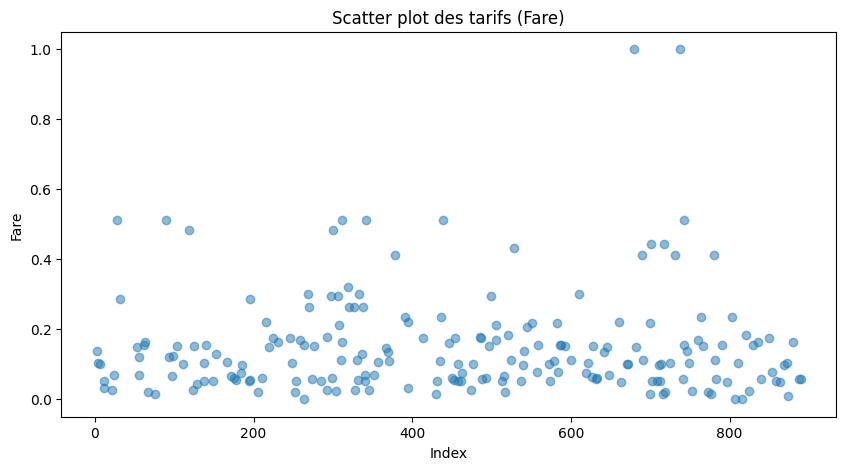

In [285]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.scatter(new_train_df3["PassengerId"], new_train_df3["Fare"], alpha = 0.5)
plt.title("Scatter plot des tarifs (Fare)")
plt.xlabel("Index")
plt.ylabel("Fare")
plt.show()

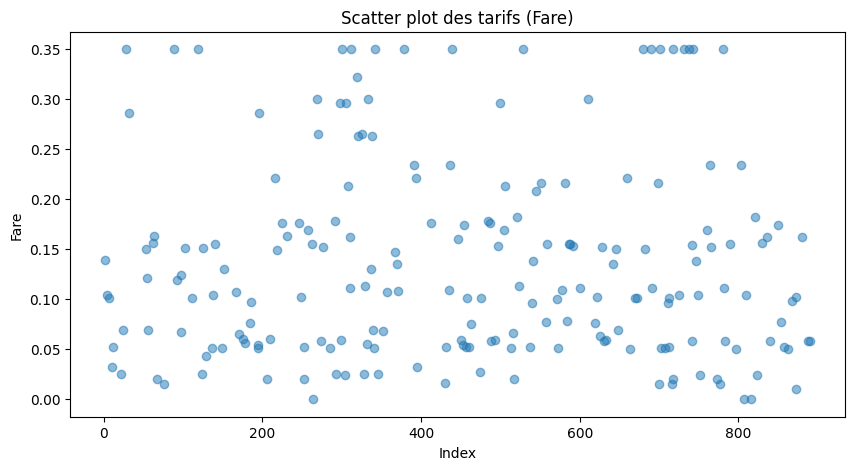

In [305]:
new_train_df4 = new_train_df3.copy()

new_train_df4["Fare"] = np.where(new_train_df4["Fare"] > upper_bound, upper_bound,
                                 np.where(new_train_df4["Fare"] < lower_bound, lower_bound,
                                 new_train_df4["Fare"]))

plt.figure(figsize = (10,5))
plt.scatter(new_train_df4["PassengerId"], new_train_df4["Fare"], alpha = 0.5)
plt.title("Scatter plot des tarifs (Fare)")
plt.xlabel("Index")
plt.ylabel("Fare")
plt.show()

🌟 Exercise 7: Data Transformation for Age Feature

In [306]:
new_train_df4.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family Size,C,Q,S,...,Van,Walker,Warren,Webber,White,Wick,Widener,Williams,Woolner,Young
1,2,1,1,0,38.0,0.139136,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,0,35.0,0.103644,2,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,7,0,1,1,54.0,0.101229,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10,11,1,3,0,4.0,0.032596,3,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11,12,1,1,0,58.0,0.051822,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [307]:
bins = [0, 50, 75, 100]
lab = ["young", "adult", "old"]

new_df_test = new_train_df4.copy()
new_df_test["Age_group"] = pd.cut(new_df_test['Age'], bins = bins, labels = lab)
new_df_test["Age_group"].value_counts()

,count
Age_group,
young,171
adult,32
old,1


In [308]:
age_dummies = pd.get_dummies(new_df_test["Age"])
final_df = pd.concat([new_train_df4, age_dummies], axis = 1)
final_df = final_df.drop(["Age"], axis = 1)
final_df

,PassengerId,Survived,Pclass,Sex,Fare,Family Size,C,Q,S,Allen,...,58.0,60.0,61.0,62.0,63.0,64.0,65.0,70.0,71.0,80.0
1,2,1,1,0,0.139136,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,0,0.103644,2,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,7,0,1,1,0.101229,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10,11,1,3,0,0.032596,3,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
11,12,1,1,0,0.051822,1,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,0.102579,3,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
872,873,0,1,1,0.009759,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
879,880,1,1,0,0.162314,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,0,0.058556,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
